# Task 2-I : Decision Tree I

* We will learn Decision Tree with [iris data](https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png)

In [ ]:
###################
## Run this cell ##
###################
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['class'] = iris.target

print(iris.target_names)
for i in range(3):
    print(f"class{i} : {iris.target_names[i]}")
print('-------------------------')
print(iris.DESCR)

['setosa' 'versicolor' 'virginica']
class0 : setosa
class1 : versicolor
class2 : virginica
-------------------------
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)

# Q1. Split the df into training set & test set

1. x : all columns in df except 'class'
2. y : the column 'class'
3. variable names :
    * x_train, y_train
    * x_test, y_test
4. train : test = 7 : 3
5. randomstate : 2021

In [ ]:
####################
## Your code here ##
####################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['class'], axis=1), df['class'],
                                                    test_size=0.3, random_state=2021 )

# Q2. Train decision tree model

0. Classification or Regression?
1. Declare your model as dt
2. Limit the depth to 3
3. random_state : 2021

In [ ]:
####################
## Your code here ##
####################
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=2021)
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')

# Q3. Make a prediction
1. y_pred_train : prediction on training set
2. y_pred_test : prediction on test set

In [ ]:
####################
## Your code here ##
####################
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Q4. Evaluate the model on the training set & test set

* Use accuracy ( unit should be % )

In [ ]:
####################
## Your code here ##
####################
from sklearn.metrics import accuracy_score as ACC

acc_train = ACC(y_train, y_pred_train )
acc_test = ACC(y_test, y_pred_test )

print(f"Accuracy on training set : {acc_train*100:.3f}%")
print(f"Accuracy on test set     : {acc_test*100:.3f}%")

Accuracy on training set : 97.143%
Accuracy on test set     : 93.333%


# Q5. Quiz using classification report

In [ ]:
#######################################
## Run this cell & Write your answer ##
#######################################
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_test, target_names=iris.target_names))

print("Q1 : What % of what is predicted to be versicolor is actually versicolor?")
print("A1 : 84%")
print("Q2 : What % of actual virginica is predicted to be virginica?")
print("A2 : 75%")

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.84      1.00      0.91        16
   virginica       1.00      0.75      0.86        12

    accuracy                           0.93        45
   macro avg       0.95      0.92      0.92        45
weighted avg       0.94      0.93      0.93        45

Q1 : What % of what is predicted to be versicolor is actually versicolor?
A1 : 84%
Q2 : What % of actual virginica is predicted to be virginica?
A2 : 75%


# Q6. Print all the feature importances.

* example is below
```
sepal_length : 12.555%
...
petal_width : 20.362%
```
* Q : Which feature is the most important for iris classification problem?
* A : 'petal width'

In [ ]:
####################
## Your code here ##
####################

for i in range(4):
    imp = dt.feature_importances_[i]
    fn = x_train.columns[i]

    print( f"{fn} : {imp*100:.3f}%")

sepal_length : 0.000%
sepal_width : 0.000%
petal_length : 0.934%
petal_width : 99.066%


# Q7. Visualize the feature importances

* Use Bar plot
    - x : names of features
    - height : feature importances
    - You can also try horizontal bar plot
* You can import more libraries you want.

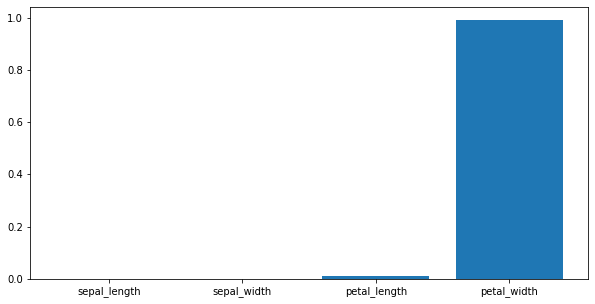

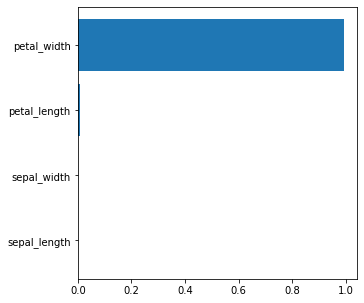

In [ ]:
####################
## Your code here ##
####################

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(x = x_train.columns, height = dt.feature_importances_)
plt.show()

plt.figure(figsize=(5,5))
plt.barh(y = x_train.columns, width = dt.feature_importances_)
plt.show()

# Q8. Visualize the decision tree

* Answer the question, according to the visualization of your model.
    * Q1 : If the petal width of the iris exceeds 0.7cm, can it be setosa?
    * Q2 : Is the result of the leaf node with the smalles number of samples reliable?
    * Q3 : If petal width > 1.75, What is the probability that of being classified as virginica?

A1 : No, by the first branch condition.
A2 : If the number of samples is small, the case may be too specific.
A3 : 97.30%


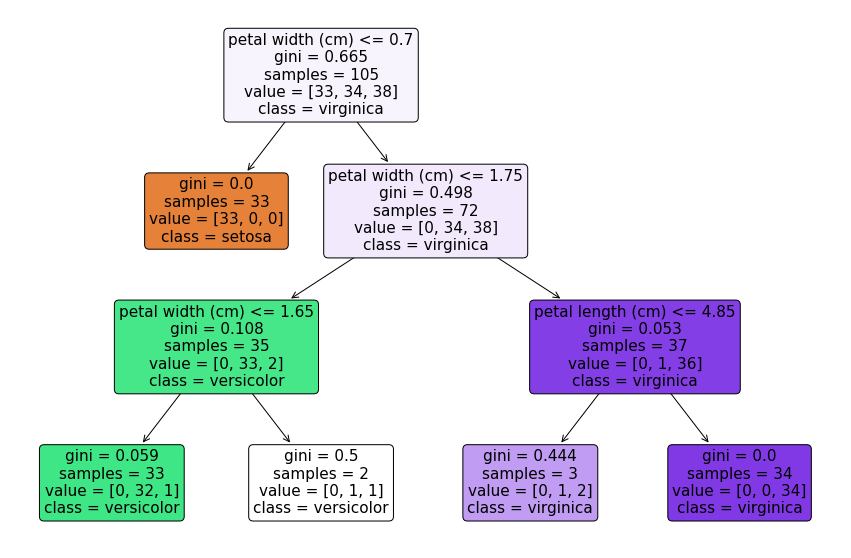

In [ ]:
####################
## Your code here ##
####################

print("A1 : No, by the first branch condition.")
print("A2 : If the number of samples is small, the case may be too specific.")
print(f"A3 : {36/(1+36) *100:.2f}%")

from sklearn.tree import plot_tree

plt.figure( figsize = (15,10))
plot_tree(dt,
          feature_names = iris.feature_names, 
          class_names = iris.target_names,
          filled=True,
          rounded=True)
plt.show()

# Q9. Write your if-else pseudo code to solve iris classification problem, using result of decision tree

* It's ok that code doesn't work.
* Just use two most important rules.

In [ ]:
###########################
## your pseudo code here ##
###########################

if petal width <= 0.7 :
    class is setosa
elif petal width <= 1.75 :
    class is versicolor
else :
    class is virginica